# Desafio 3 - Funções de probabilidade

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

**Objetivo**
O objetivo deste desafio é explorar as principais funções sobre distribuições de probabilidade como PDF, CDF e quantis e as relações entre duas das principais distribuições: a normal e a binomial.

Para isso, utilizaremos dados artificiais e reais. Como dados reais, exploraremos o data set Pulsar Star disponibilizado pelo Dr. Robert Lyon da Universidade de Manchester.

Esse data set consiste de 8 variáveis a respeito de 17898 observações de estrelas. Essas estrelas foram consideradas “candidatas” a serem estrelas do tipo pulsar, que têm forte importância para os astrofísicos. Uma nona coluna do data set especifica se a estrela é realmente um pulsar (caso positivo, 1) ou não (caso negativo, 0).

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [5]:
# Dimensões do data frame

dataframe.shape

(10000, 2)

In [6]:
# Sumarização dos dados

dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


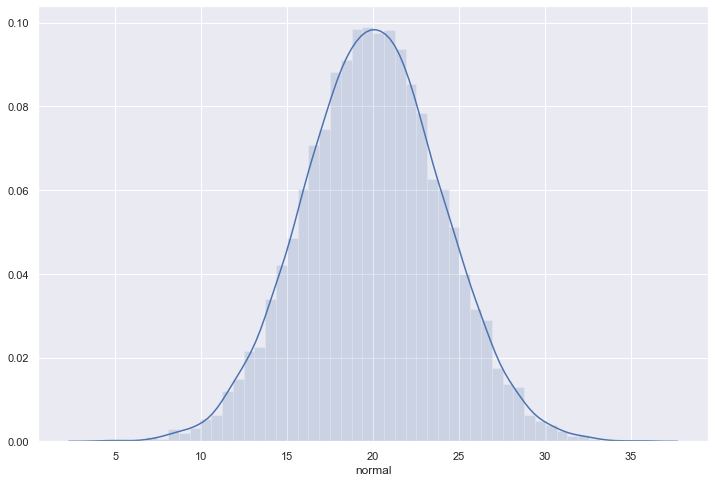

In [7]:
# Distribuição Normal

sns.distplot(dataframe['normal'], label = 'Normal', hist_kws= {'alpha' : 0.2})
plt.show()

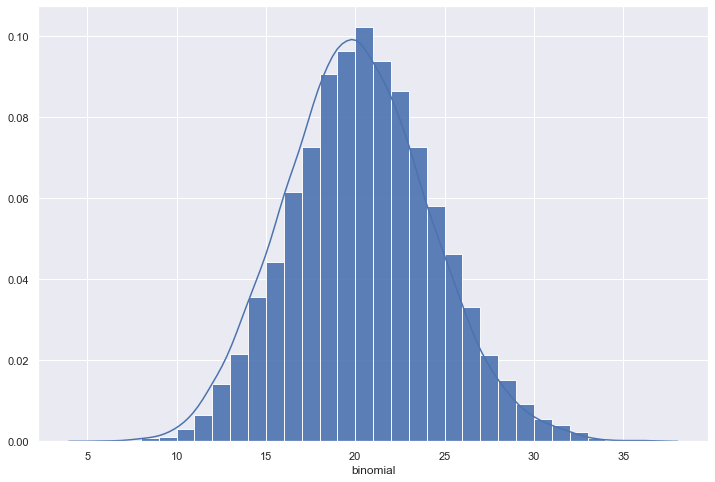

In [8]:
# Distribuição Binomial

sns.distplot(dataframe['binomial'], bins = range(6, 36), kde = True, label = 'Binomial', hist_kws = {'alpha' : 0.9})
plt.show()

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [9]:
def q1():
    # Retorne aqui o resultado da questão 1.
    quantiles = [dataframe.quantile(q = x) for x in [0.25, 0.5, 0.75]]
    aux = ([round(quantiles[i][0].item() - quantiles[i][1].item(), 3) for i in range(3)])
    return tuple(aux)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [11]:
def q2():
    # Retorne aqui o resultado da questão 2.
    left = dataframe.normal.mean() - dataframe.normal.std()
    right = dataframe.normal.mean() + dataframe.normal.std()
    
    prob_left = sct.norm.cdf(left, loc = 20, scale = 4)
    prob_right = sct.norm.cdf(right, loc = 20, scale = 4)
    prob_interval = prob_right - prob_left
    
    return prob_interval.item()

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [23]:
def q3():
    # Retorne aqui o resultado da questão 3.
    m_binom = dataframe.binomial.mean().item()
    v_binom = dataframe.binomial.var().item()
    
    m_norm = dataframe.binomial.mean().item()
    v_norm = dataframe.binomial.var().item()
    
    return (round(m_binom - m_norm, 3), round(v_binom - v_norm, 3))

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [14]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [15]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [16]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [17]:
stars[stars['target'] == True]

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
18,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,True
41,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,True
60,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,True
91,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,True
92,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,True
...,...,...,...,...,...,...,...,...,...
17514,89.867188,47.482295,1.591325,2.505057,0.763378,12.393561,17.940745,333.902631,True
17528,27.039062,33.754722,4.779124,26.255357,129.863712,78.815440,-0.348492,-0.893791,True
17557,77.070312,39.000638,1.884421,6.372178,38.517559,65.741059,1.589513,1.285346,True
17641,28.375000,27.649311,6.377273,45.944048,141.860368,82.893017,-0.477222,-1.067880,True


In [18]:
stars[stars['target'] == True].describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000
mean,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728
std,30.007707,8.033614,1.872861,13.997200,45.287932,19.731080,3.105945,50.896263
min,5.812500,24.772042,-0.094888,-1.139069,0.486622,7.658623,-1.862320,-1.874683
25%,31.777344,32.284803,1.556038,3.805492,12.759615,43.333643,0.756451,-0.228294
50%,54.296875,37.341297,2.961258,11.609644,33.494983,59.367088,1.918327,2.585145
75%,79.277344,43.759278,4.586930,24.881853,78.313545,70.985965,3.709978,13.469687
max,139.257812,83.796909,8.069522,68.101622,199.577759,109.655345,30.883882,1017.383180


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [19]:
def q4():
    # Retorne aqui o resultado da questão 4.
    false_pulsar_mean_profile = stars.loc[stars['target'] == False, 'mean_profile']
    false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile - false_pulsar_mean_profile.mean())/false_pulsar_mean_profile.std()
    
    q1_norm, q2_norm, q3_norm = [sct.norm.ppf(x, loc = 0, scale = 1) for x in [0.80, 0.90, 0.95]]
        
    q1 = round((false_pulsar_mean_profile_standardized <= q1_norm).sum()/len(false_pulsar_mean_profile_standardized), 3).item()
    q2 = round((false_pulsar_mean_profile_standardized <= q2_norm).sum()/len(false_pulsar_mean_profile_standardized), 3).item()
    q3 = round((false_pulsar_mean_profile_standardized <= q3_norm).sum()/len(false_pulsar_mean_profile_standardized), 3).item()
    
    return (q1, q2, q3)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [20]:
def q5():
    # Retorne aqui o resultado da questão 5.
    false_pulsar_mean_profile = stars.loc[stars['target'] == False, 'mean_profile']
    false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile - false_pulsar_mean_profile.mean())/false_pulsar_mean_profile.std()
    
    q1_norm, q2_norm, q3_norm = [sct.norm.ppf(x, loc = 0, scale = 1) for x in [0.25, 0.5, 0.75]]
    
    q1_pulsar, q2_pulsar, q3_pulsar = [false_pulsar_mean_profile_standardized.quantile(q = x).item() for x in [0.25, 0.5, 0.75]]
    
    dif1 = round(q1_pulsar - q1_norm, 3)
    dif2 = round(q2_pulsar - q2_norm, 3)
    dif3 = round(q3_pulsar - q3_norm, 3)
    
    return (dif1, dif2, dif3)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.